## 생존여부 예측모델 만들기
### 학습용 데이터 (X_train, y_train)을 이용하여 생존 예측 모형을 만든 후, 이를 평가용 데이터(X_test)에 적용하여 얻은 예측값을 다음과 같은 형식의 CSV파일로 생성하시오(제출한 모델의 성능은 accuracy 평가지표에 따라 채점)

(가) 제공 데이터 목록
- y_train: 생존여부(학습용)
- X_trian, X_test : 승객 정보 (학습용 및 평가용)

(나) 데이터 형식 및 내용
- y_trian (712명 데이터)

**시험환경 세팅은 예시문제와 동일한 형태의 X_train, y_train, X_test 데이터를 만들기 위함임**

### 유의사항
- 성능이 우수한 예측모형을 구축하기 위해서는 적절한 데이터 전처리, 피처엔지니어링, 분류알고리즘, 하이퍼파라미터 튜닝, 모형 앙상블 등이 수반되어야 한다.
- 수험번호.csv파일이 만들어지도록 코드를 제출한다.
- 제출한 모델의 성능은 accuracy로 평가함

csv 출력형태

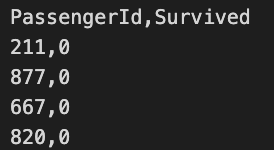

## [참고]작업형2 문구
- 출력을 원하실 경우 print() 함수 활용
- 예시) print(df.head())
- getcwd(), chdir() 등 작업 폴더 설정 불필요
- 파일 경로 상 내부 드라이브 경로(C: 등) 접근 불가

### 데이터 파일 읽기 예제
- import pandas as pd
- X_test = pd.read_csv("data/X_test.csv")
- X_train = pd.read_csv("data/X_train.csv")
- y_train = pd.read_csv("data/y_train.csv")

### 사용자 코딩

### 답안 제출 참고
- 아래 코드 예측변수와 수험번호를 개인별로 변경하여 활용
- pd.DataFrame({'cust_id': X_test.cust_id, 'gender': pred}).to_csv('003000000.csv', index=False)

In [1]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("../input/titanic/train.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='Survived', id_name='PassengerId')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712, 2), (179, 2))

## Start

In [9]:
import pandas as pd
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
90,91,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
103,104,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
577,578,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S
215,216,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
191,192,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S


In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 90 to 116
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          575 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        170 non-null    object 
 10  Embarked     711 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [11]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 210 to 45
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Pclass       179 non-null    int64  
 2   Name         179 non-null    object 
 3   Sex          179 non-null    object 
 4   Age          139 non-null    float64
 5   SibSp        179 non-null    int64  
 6   Parch        179 non-null    int64  
 7   Ticket       179 non-null    object 
 8   Fare         179 non-null    float64
 9   Cabin        34 non-null     object 
 10  Embarked     178 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 16.8+ KB


In [39]:
# NaN 값이 많은 Cabin, 상관 없는 Name은 drop
X_test_drop = X_test.drop(['Cabin', 'Name', 'Ticket'], axis=1)
X_train_drop = X_train.drop(['Cabin', 'Name', 'Ticket'], axis=1)

In [40]:
# Age, Embarked는 최빈값으로 채움
X_train_drop['Age'] = X_train_drop['Age'].fillna(X_train_drop['Age'].mode()[0])
X_train_drop['Embarked'] = X_train_drop['Embarked'].fillna(X_train_drop['Embarked'].mode()[0])

X_test_drop['Age'] = X_test_drop['Age'].fillna(X_test_drop['Age'].mode()[0])
X_test_drop['Embarked'] = X_test_drop['Embarked'].fillna(X_test_drop['Embarked'].mode()[0])

In [41]:
X_train_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 90 to 116
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Sex          712 non-null    object 
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   Embarked     712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [43]:
X_train_drop.Sex.unique(), X_train_drop.Embarked.unique()

(array(['male', 'female'], dtype=object), array(['S', 'C', 'Q'], dtype=object))

In [72]:
# 범주형 변수 변경: One-hot Encoding, Label Encoding

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

onehot = OneHotEncoder(sparse=False, drop='first')
label = LabelEncoder()

onehot_result = onehot.fit_transform(X_train_drop)

feature_names = onehot.get_feature_names(input_features=X_train_drop.columns)

In [73]:
onehot_df = pd.DataFrame(onehot_result, columns=onehot.get_feature_names())

In [74]:
onehot_df.head()

,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,x0_11,x0_12,x0_13,...,x6_211.3375,x6_211.5,x6_221.7792,x6_227.525,x6_247.5208,x6_262.375,x6_263.0,x6_512.3292,x7_Q,x7_S
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 라이브러리 및 데이터 불러오기

In [4]:
# 라이브러리 불러오기
import pandas as pd

In [5]:
# 데이터 불러오기 (생략)
X_train.shape, y_train.shape, X_test.shape

((712, 11), (712, 2), (179, 11))

## EDA

In [53]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
90,91,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
103,104,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
577,578,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S
215,216,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
191,192,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S


In [54]:
# float64(2), int64(3), object(5)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 90 to 116
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          575 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        170 non-null    object 
 10  Embarked     711 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [55]:
y_train.head()

,PassengerId,Survived
90,91,0
103,104,0
577,578,1
215,216,1
191,192,0


In [56]:
# 생존 비율
y_train['Survived'].value_counts()

0    441
1    271
Name: Survived, dtype: int64

## 데이터 전처리

In [60]:
y = y_train["Survived"]

# sex만 원핫인코딩 됨
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(X_train[features])
test = pd.get_dummies(X_test[features])
X

,Pclass,SibSp,Parch,Sex_female,Sex_male
90,3,0,0,0,1
103,3,0,0,0,1
577,1,1,0,1,0
215,1,1,0,1,0
191,2,0,0,0,1
...,...,...,...,...,...
621,1,1,0,0,1
128,3,1,1,1,0
57,3,0,0,0,1
341,1,3,2,1,0


In [59]:
X.shape, test.shape

((712, 5), (179, 5))

## 모델 및 평가

In [61]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=2021)
model.fit(X, y)
predictions = model.predict(test)

In [62]:
model.score(X, y)

0.8356741573033708

In [63]:
output = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': predictions})
output.head()

,PassengerId,Survived
210,211,0
876,877,0
666,667,0
819,820,0
736,737,0


In [64]:
# 수험번호.csv로 출력
output.to_csv('1234567.csv', index=False)

## 결과 체점 (수험자는 알 수 없는 부분임)

In [65]:
model.score(test, y_test['Survived'])

0.7318435754189944